# Clustering 

## This notebook is written to investigate the effects of using PCA analysis and different numbers of clustering on the HBN data.

The original data beinig used on the 08/02 is IQTable4.csv. All participants in this table are classified as "poor readers" based on the fact that they scored in the bottom 40 percentile in 2 out of 8 reading tests. 
There are 8 features in the table : VCI, WMI, WM, PSI, Pattern, Attention, Elision and Belnding Words. Have previously used PCA, I am going to look at clustering the features as they are. Also, in contrast to the previous notebooks, I am not including an average or above average VCI score. Instead this will be included as a feature. Also, I will look at different cluster numbers.



*Imports*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler


%config InlineBackend.figure_format='retina'

### Load in the data <br>


In [2]:
df = pd.read_csv('IQTable4.csv')
# df.head()
data = StandardScaler().fit_transform(df)
Data=pd.DataFrame(data)


NameError: name 'pd' is not defined

## Finding Clusters

Compute the within cluster sum of squares (WCSS) to choose an appropriate number of clusters

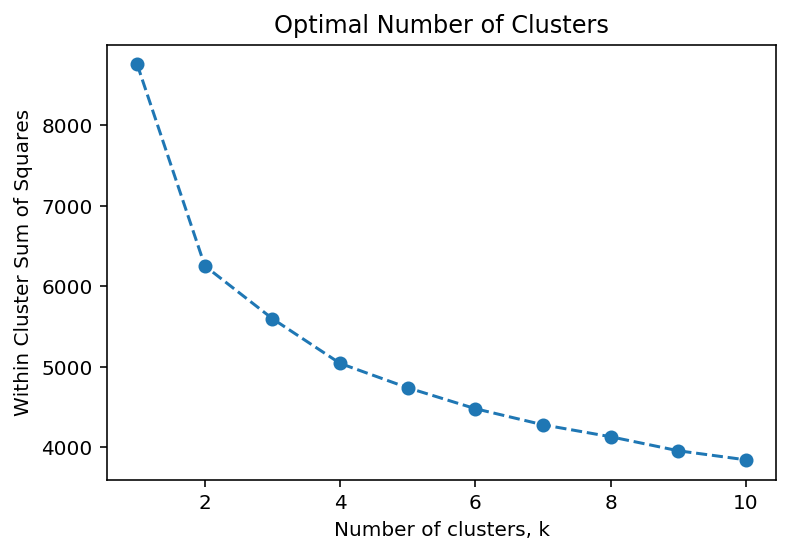

In [3]:
inertias = []    # WCSS

# Try 10 clusters
for k in range(1,11):
    model = KMeans(n_clusters=k, init ='k-means++', random_state=42)
    model.fit(Data)
    inertias.append(model.inertia_)
    
# "Elbow Criterion":
plt.plot(range(1,11), inertias, marker ='o', linestyle='--')
plt.xlabel('Number of clusters, k')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Optimal Number of Clusters')
plt.show()

*Computing the Silhouette Coefficient gives a measure of cluster cohesion and separation.*<br> *It can be used as a metric use to calcute the goodenss of a clustering technique.*

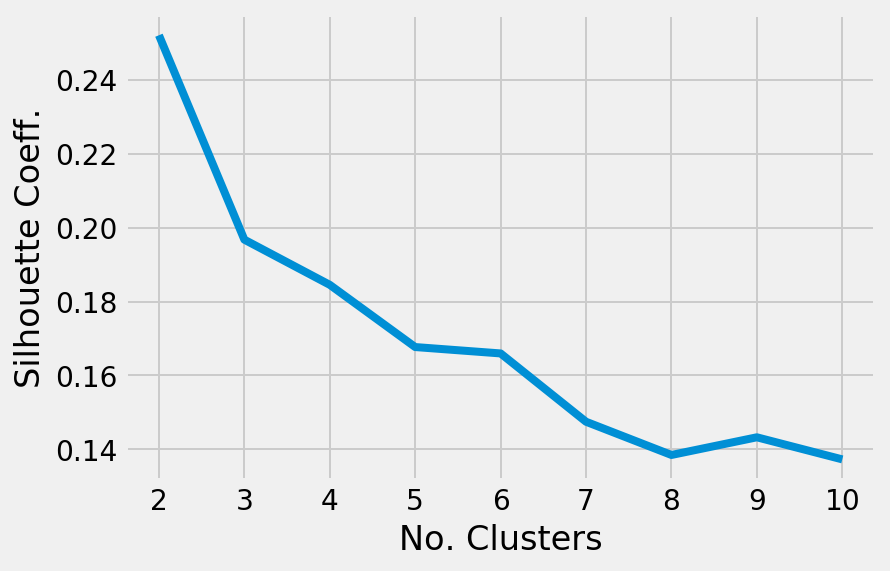

In [4]:
silhouette_coefficients =[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++', random_state=42)
    kmeans.fit(Data)
    # silhouette_score() needs a minimum of 2 clusters
    score = silhouette_score(Data, kmeans.labels_)
    silhouette_coefficients.append(score)
    

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Coeff.")
plt.show()

## Clustering:

<br> Starting with four Clusters 09/02/2021
<br> **Look at a better way of visualising the clusters .. 

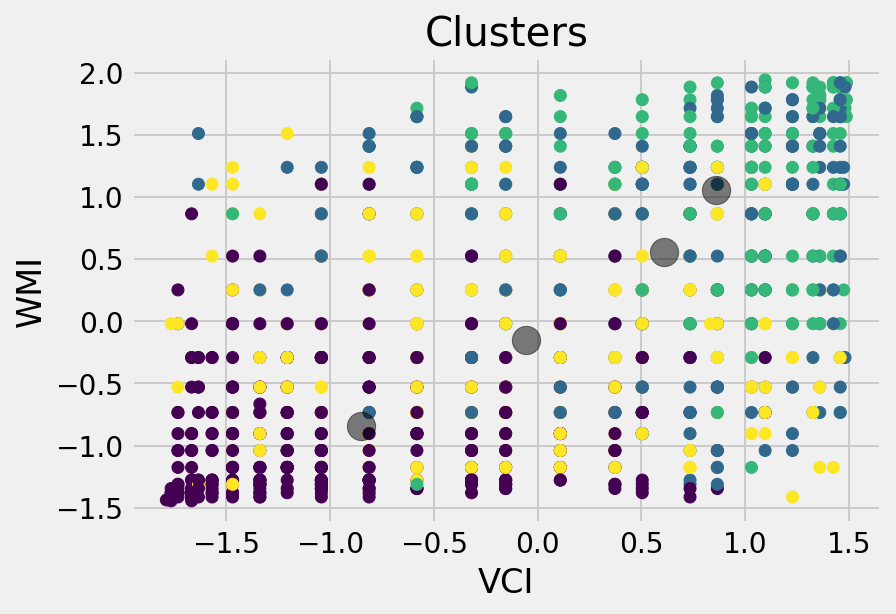

In [5]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
kmeans_pca.fit(Data)

labels = kmeans_pca.predict(Data)

plt.scatter(Data[0], Data[1], c=labels)
plt.xlabel('VCI')
plt.ylabel('WMI')
plt.title('Clusters')
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

Adding the cluster labels to the dataframe:

In [6]:
df['Cluster'] = kmeans_pca.labels_
df.head()

,WISC - VCI,WISC - WMI,NIH - WM,WISC - PSI,Pattern Comp.,Visuo-Spat Attention,CTOPP - Elision,CTOPP - Blended W,Cluster
0,50.0,91.0,83.9,13.0,1.0,41.3,25.0,5.0,1
1,77.0,4.0,47.2,1.0,12.5,3.3,50.0,50.0,1
2,37.0,50.0,60.3,50.0,81.9,40.1,37.0,25.0,3
3,23.0,12.0,33.4,23.0,69.8,14.5,16.0,2.0,0
4,77.0,75.0,17.6,2.0,63.7,15.9,37.0,16.0,1


### Cluster Breakdown:
 Count the number of particpants in each cluster and express as a percentage of total participant numbers:

In [7]:
c0= df.loc[df.Cluster == 0, 'Cluster'].count()
c1=df.loc[df.Cluster == 1, 'Cluster'].count()
c2= df.loc[df.Cluster == 2, 'Cluster'].count()
c3=df.loc[df.Cluster == 3, 'Cluster'].count()

print(c0, c1, c2, c3)

print("The % of participants in cluster 0: " +"{:.2f}".format(c0/1094*100) +"%")
print("The % of participants in cluster 1: "+"{:.2f}".format(c1/1094*100)+"%")
print("The % of participants in cluster 2: "+"{:.2f}".format(c2/1094*100)+"%")
print("The % of participants in cluster 3: "+"{:.2f}".format(c3/1094*100)+"%")

365 272 186 271
The % of participants in cluster 0: 33.36%
The % of participants in cluster 1: 24.86%
The % of participants in cluster 2: 17.00%
The % of participants in cluster 3: 24.77%


Function to add the values of the segments in a pie chart for the figure created below:

In [8]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

A function that takes in the data frame and the cluster number you wish to investiagte

In [9]:
def component_scores(DF, number):
    Cluster0 = DF[DF.Cluster == number]

    poorWMI=0
    goodWMI=0
    poorWM=0
    goodWM=0
    poorPSI=0
    goodPSI=0
    poorPatt=0
    goodPatt=0
    poorAtt=0
    goodAtt=0
    poorEl=0
    goodEl=0
    poorBw=0
    goodBw=0
    poorVCI=0
    goodVCI=0

    for n in Cluster0['WISC - WMI']:
        if n<40:
            poorWMI= poorWMI+1
        elif n>=40:
            goodWMI=goodWMI+1

    for n in Cluster0['NIH - WM']:
        if n<40:
            poorWM= poorWM+1
        elif n>=40:
            goodWM=goodWM+1

    for n in Cluster0['WISC - PSI']:
        if n<40:
            poorPSI= poorPSI+1
        elif n>=40:
            goodPSI=goodPSI+1

    for n in Cluster0['Pattern Comp.']:
        if n<40:
            poorPatt= poorPatt+1
        elif n>=40:
            goodPatt=goodPatt+1

    for n in Cluster0['Visuo-Spat Attention']:
        if n<40:
            poorAtt= poorAtt+1
        elif n>=40:
            goodAtt=goodAtt+1

    for n in Cluster0['CTOPP - Elision']:
        if n<40:
            poorEl= poorEl+1
        elif n>=40:
            goodEl=goodEl+1

    for n in Cluster0['CTOPP - Blended W']:
        if n<40:
            poorBw= poorBw+1
        elif n>=40:
            goodBw=goodBw+1

            
    for n in Cluster0['WISC - VCI']:
        if n<40:
            poorVCI= poorVCI+1
        elif n>=40:
            goodVCI=goodVCI+1

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    WMIlabels = 'Poor WMI', 'Good WMI'
    WMlables = 'Poor WM', 'Good WM'
    PSIlabels = 'Poor PSI', 'Good PSI'
    Patternlabels = 'Poor Pattern', 'Good Pattern'
    Attlabels= 'Poor Attent.', 'Good Attent.'
    Ellables = 'Poor Elision', 'Good Elision'
    Bwlabels = 'Poor Blending W.', 'Good Blending W.'
    VCIlabels = 'Poor VCI', 'Good VCI'

    WMIsizes = [poorWMI, goodWMI]
    WMsizes = [poorWM, goodWM]
    PSIsize = [poorPSI, goodPSI]
    Pattsize =[poorPatt, goodPatt]
    Attensize=[poorAtt, goodAtt]
    Elsize = [poorEl, goodEl]
    Bwsize = [poorBw, goodBw]
    VCIsizes = [poorVCI, goodVCI]

    fig, axs = plt.subplots(3, 3)
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle("Cluster " + str(number), fontsize=30)
    axs[0,0].pie(WMIsizes, labels=WMIlabels,autopct=make_autopct(WMIsizes))
    axs[0,0].set_title('WISC-WMI')
    axs[0,1].pie(WMsizes, labels=WMlables, autopct=make_autopct(WMsizes))
    axs[0,1].set_title('NIH-WM')
    axs[0,2].pie(Attensize, labels =Attlabels, autopct = make_autopct(Attensize))
    axs[0,2].set_title('Visuo-Spat Attention')
    axs[1,0].pie(PSIsize, labels=PSIlabels, autopct=make_autopct(PSIsize))
    axs[1,0].set_title('WISC-PSI')
    axs[1,1].pie(Pattsize, labels=Patternlabels, autopct=make_autopct(Pattsize))
    axs[1,1].set_title('NIH-Patterns')
    axs[1,2].pie(Elsize, labels=Ellables, autopct=make_autopct(Elsize))
    axs[1,2].set_title('Elision')
    axs[2,0].pie(Bwsize, labels=Bwlabels, autopct=make_autopct(Bwsize))
    axs[2,0].set_title('Blending Words')
    axs[2,1].pie(VCIsizes, labels=VCIlabels,autopct=make_autopct(VCIsizes))
    axs[2,1].set_title('WISC-VCI')
    axs[-1, -1].axis('off')
    axs[-1, -2].axis('off')

    plt.show()

In [3]:
component_scores(df, 0)

NameError: name 'component_scores' is not defined

I am going to compute 2 Principle Components in order to visualise the clusters. The labels have already been assigned and PCs are only used to plot the scatter plot:

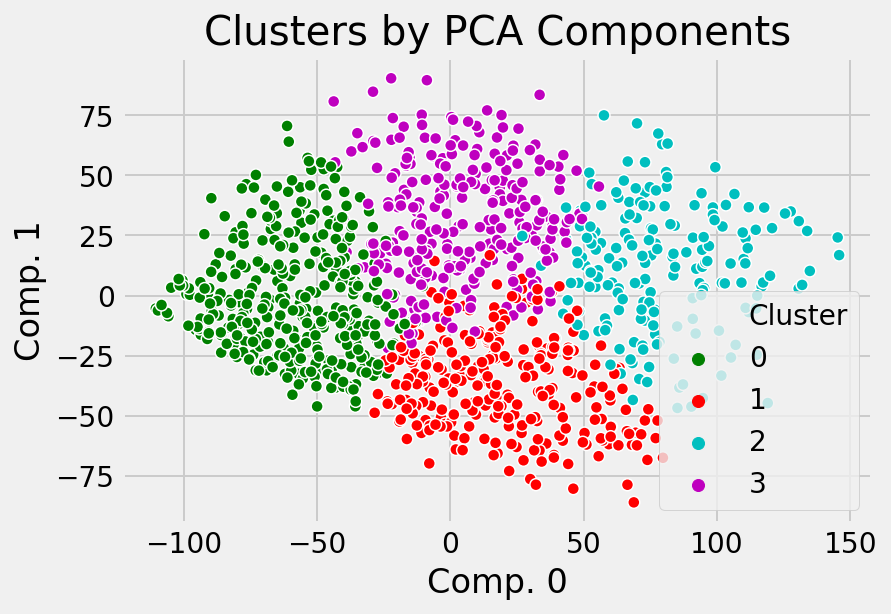

In [11]:
pca = PCA(n_components=2)
PCA_components = pca.fit_transform(df)

df_2= pd.concat([df.reset_index(drop=True), pd.DataFrame(PCA_components)], axis=1)
df_2.columns.values[-2: ]=['Comp. 0', 'Comp. 1']

x_axis = df_2['Comp. 0']
y_axis = df_2['Comp. 1']
sns.scatterplot(x_axis, y_axis, hue=df['Cluster'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')

plt.show()

## 5 Clusters:

In [34]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
kmeans_pca.fit(Data)

labels = kmeans_pca.predict(Data)

df['Cluster'] = kmeans_pca.labels_

c0= df.loc[df.Cluster == 0, 'Cluster'].count()
c1=df.loc[df.Cluster == 1, 'Cluster'].count()
c2= df.loc[df.Cluster == 2, 'Cluster'].count()
c3=df.loc[df.Cluster == 3, 'Cluster'].count()
c4=df.loc[df.Cluster == 4, 'Cluster'].count()

print(c0, c1, c2, c3, c4)

print("The % of participants in cluster 0: " +"{:.2f}".format(c0/1094*100) +"%")
print("The % of participants in cluster 1: "+"{:.2f}".format(c1/1094*100)+"%")
print("The % of participants in cluster 2: "+"{:.2f}".format(c2/1094*100)+"%")
print("The % of participants in cluster 3: "+"{:.2f}".format(c3/1094*100)+"%")
print("The % of participants in cluster 4: "+"{:.2f}".format(c4/1094*100)+"%")

173 157 221 318 225
The % of participants in cluster 0: 15.81%
The % of participants in cluster 1: 14.35%
The % of participants in cluster 2: 20.20%
The % of participants in cluster 3: 29.07%
The % of participants in cluster 4: 20.57%


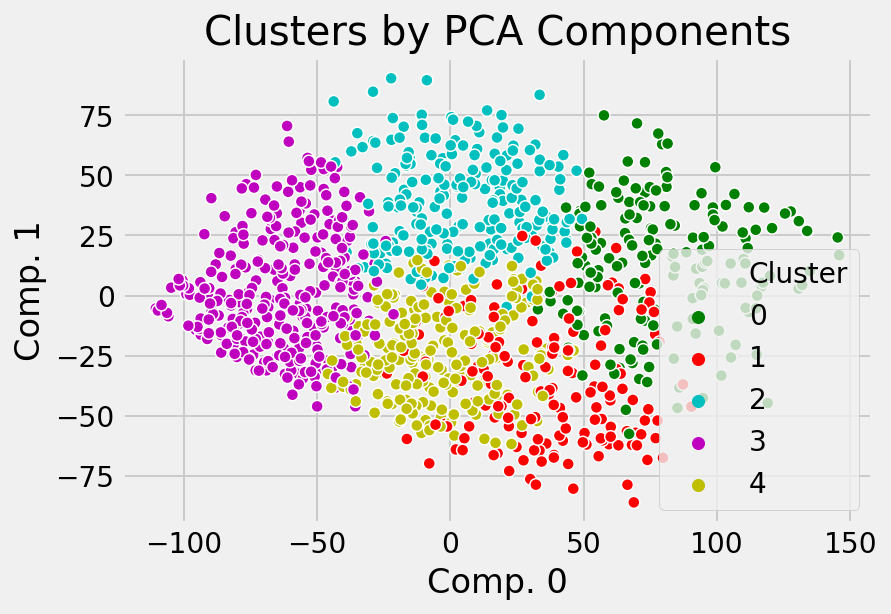

In [35]:
df_2= pd.concat([df.reset_index(drop=True), pd.DataFrame(PCA_components)], axis=1)
df_2.columns.values[-2: ]=['Comp. 0', 'Comp. 1']

x_axis = df_2['Comp. 0']
y_axis = df_2['Comp. 1']
sns.scatterplot(x_axis, y_axis, hue=df['Cluster'], palette = ['g','r','c','m','y'])
plt.title('Clusters by PCA Components')

plt.show()

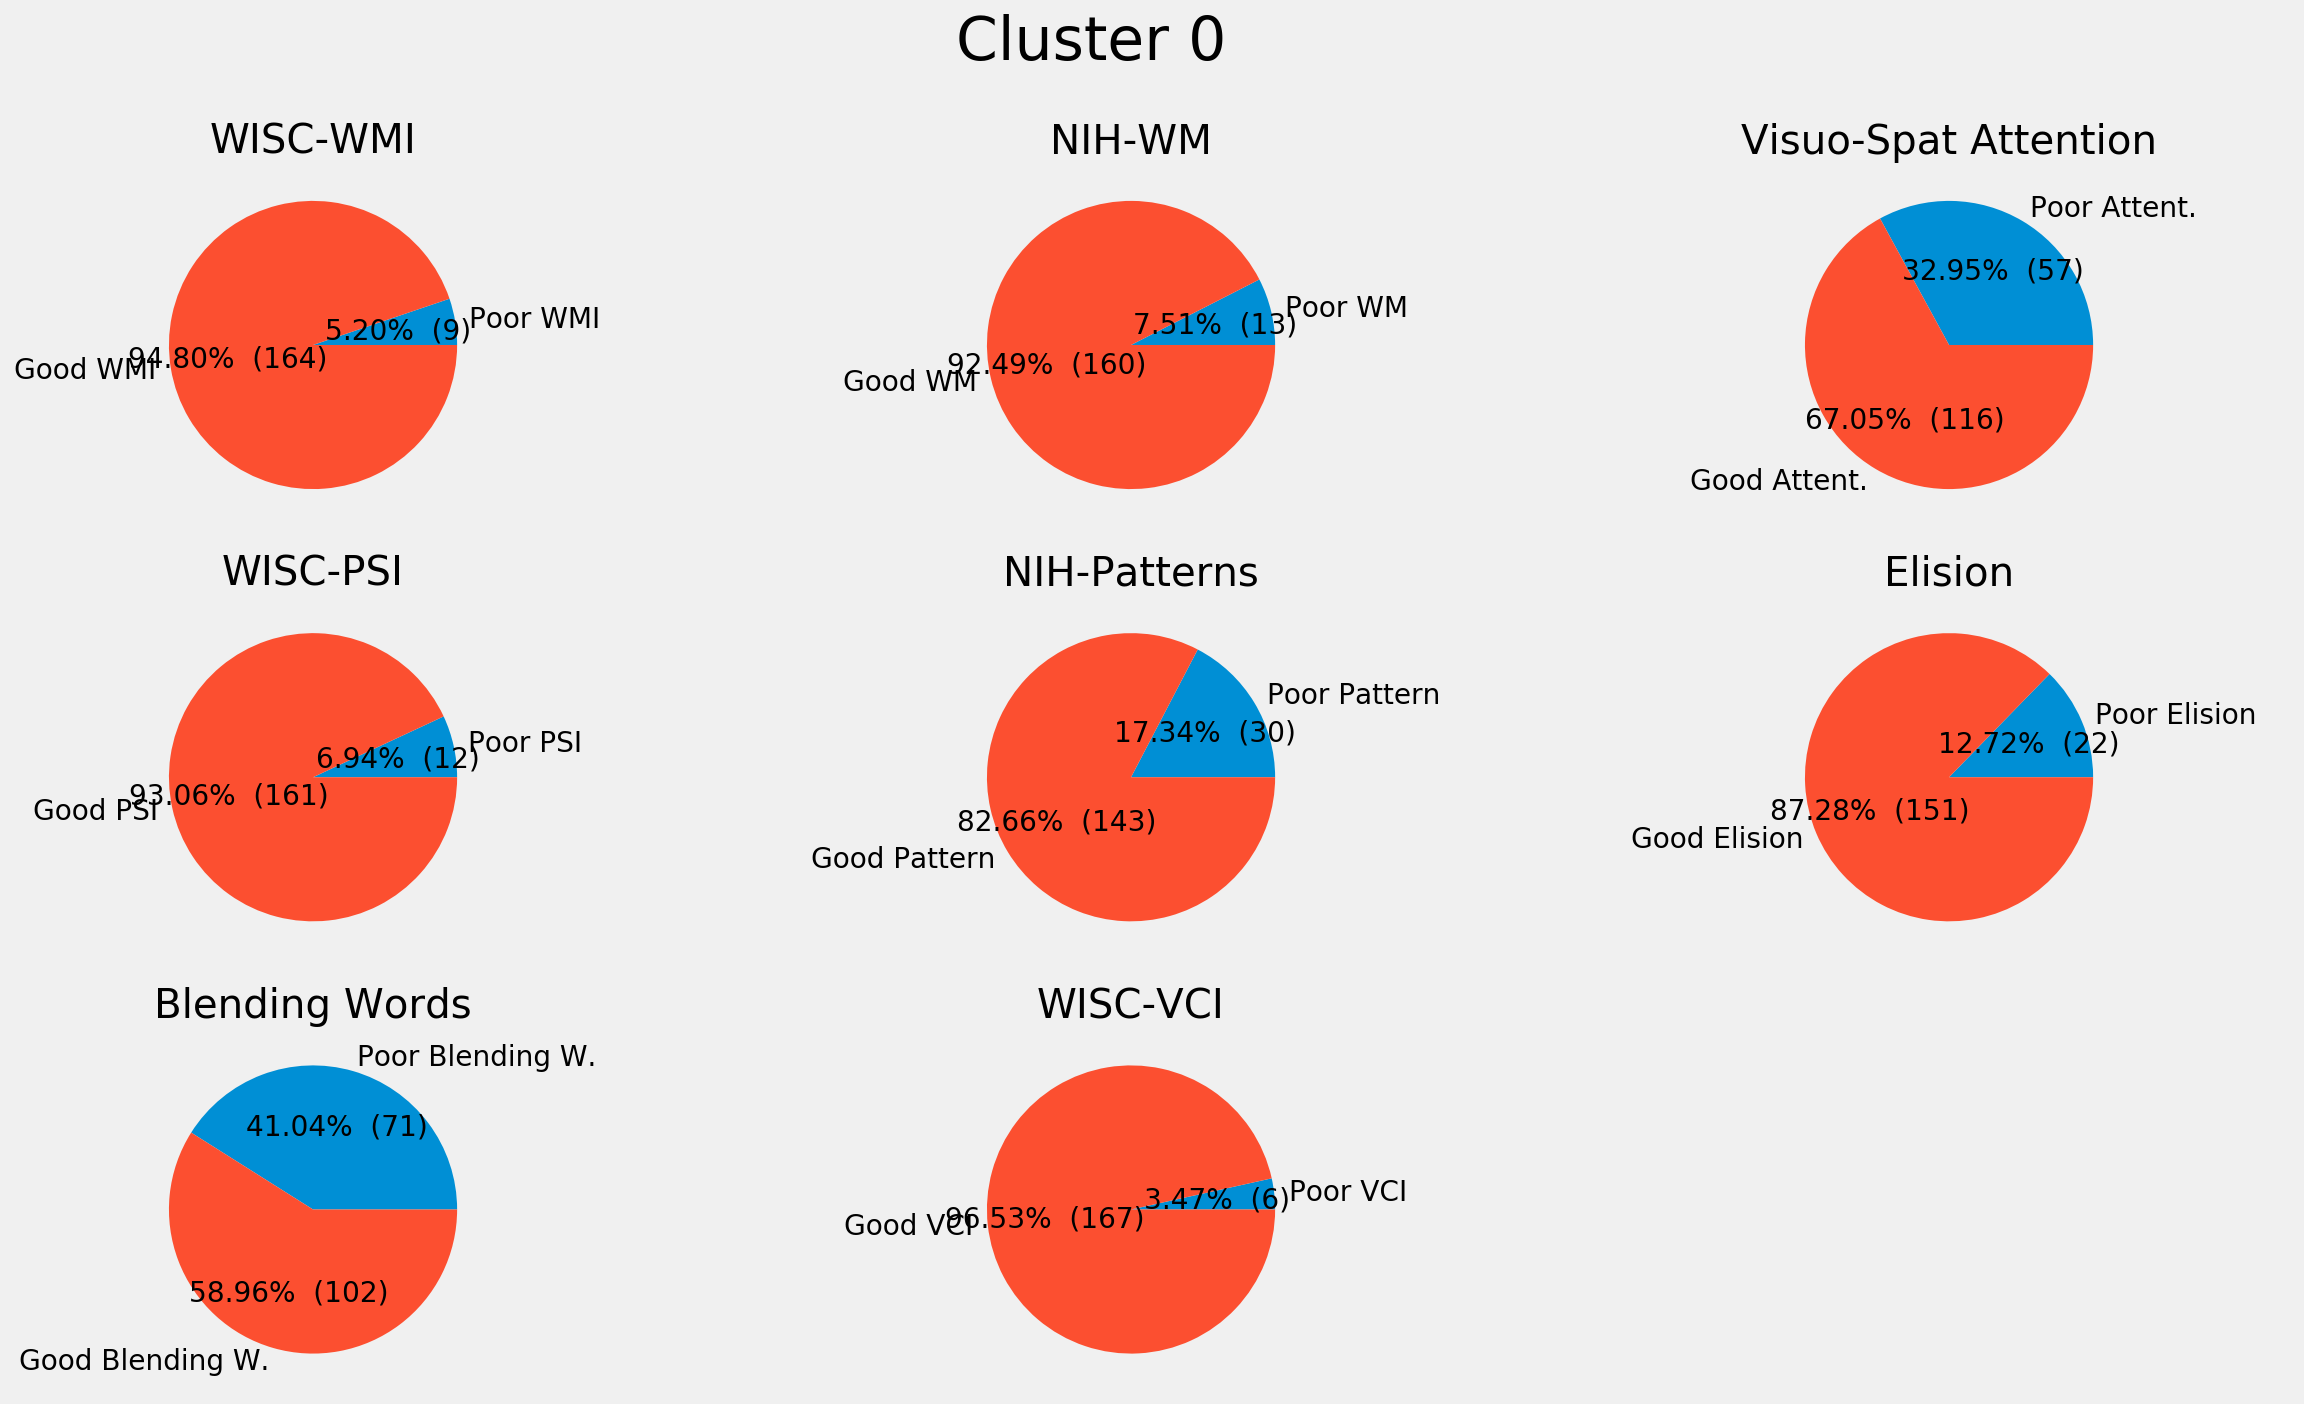

In [14]:
component_scores(df, 0)

## 6 Clusters:

In [15]:
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state=42)
kmeans_pca.fit(Data)

labels = kmeans_pca.predict(Data)

df['Cluster'] = kmeans_pca.labels_

c0= df.loc[df.Cluster == 0, 'Cluster'].count()
c1=df.loc[df.Cluster == 1, 'Cluster'].count()
c2= df.loc[df.Cluster == 2, 'Cluster'].count()
c3=df.loc[df.Cluster == 3, 'Cluster'].count()
c4=df.loc[df.Cluster == 4, 'Cluster'].count()
c5=df.loc[df.Cluster == 5, 'Cluster'].count()

print(c0, c1, c2, c3, c4, c5)

print("The % of participants in cluster 0: " +"{:.2f}".format(c0/1094*100) +"%")
print("The % of participants in cluster 1: "+"{:.2f}".format(c1/1094*100)+"%")
print("The % of participants in cluster 2: "+"{:.2f}".format(c2/1094*100)+"%")
print("The % of participants in cluster 3: "+"{:.2f}".format(c3/1094*100)+"%")
print("The % of participants in cluster 4: "+"{:.2f}".format(c4/1094*100)+"%")
print("The % of participants in cluster 5: "+"{:.2f}".format(c5/1094*100)+"%")

154 189 163 105 185 298
The % of participants in cluster 0: 14.08%
The % of participants in cluster 1: 17.28%
The % of participants in cluster 2: 14.90%
The % of participants in cluster 3: 9.60%
The % of participants in cluster 4: 16.91%
The % of participants in cluster 5: 27.24%


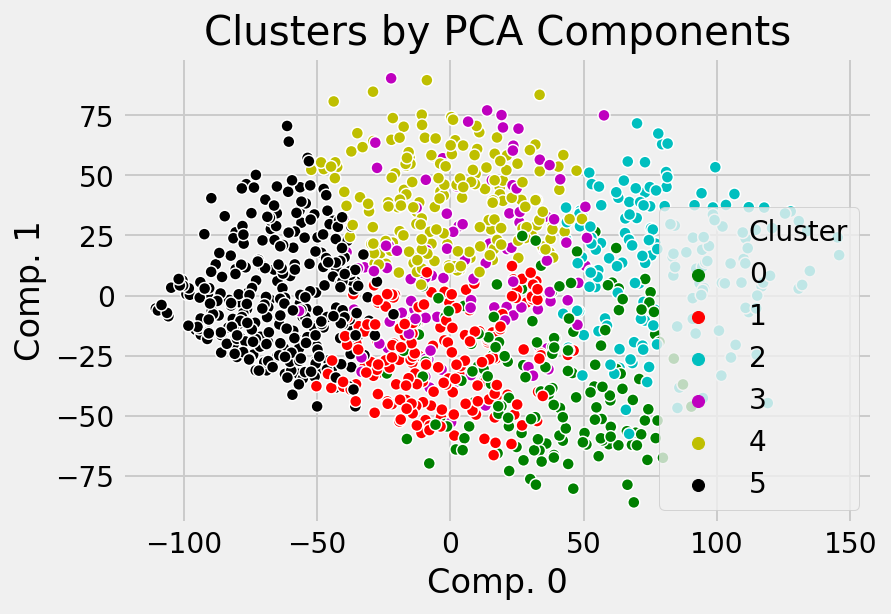

In [16]:
df_2= pd.concat([df.reset_index(drop=True), pd.DataFrame(PCA_components)], axis=1)
df_2.columns.values[-2: ]=['Comp. 0', 'Comp. 1']

x_axis = df_2['Comp. 0']
y_axis = df_2['Comp. 1']
sns.scatterplot(x_axis, y_axis, hue=df['Cluster'], palette = ['g','r','c','m','y','k'])
plt.title('Clusters by PCA Components')

plt.show()

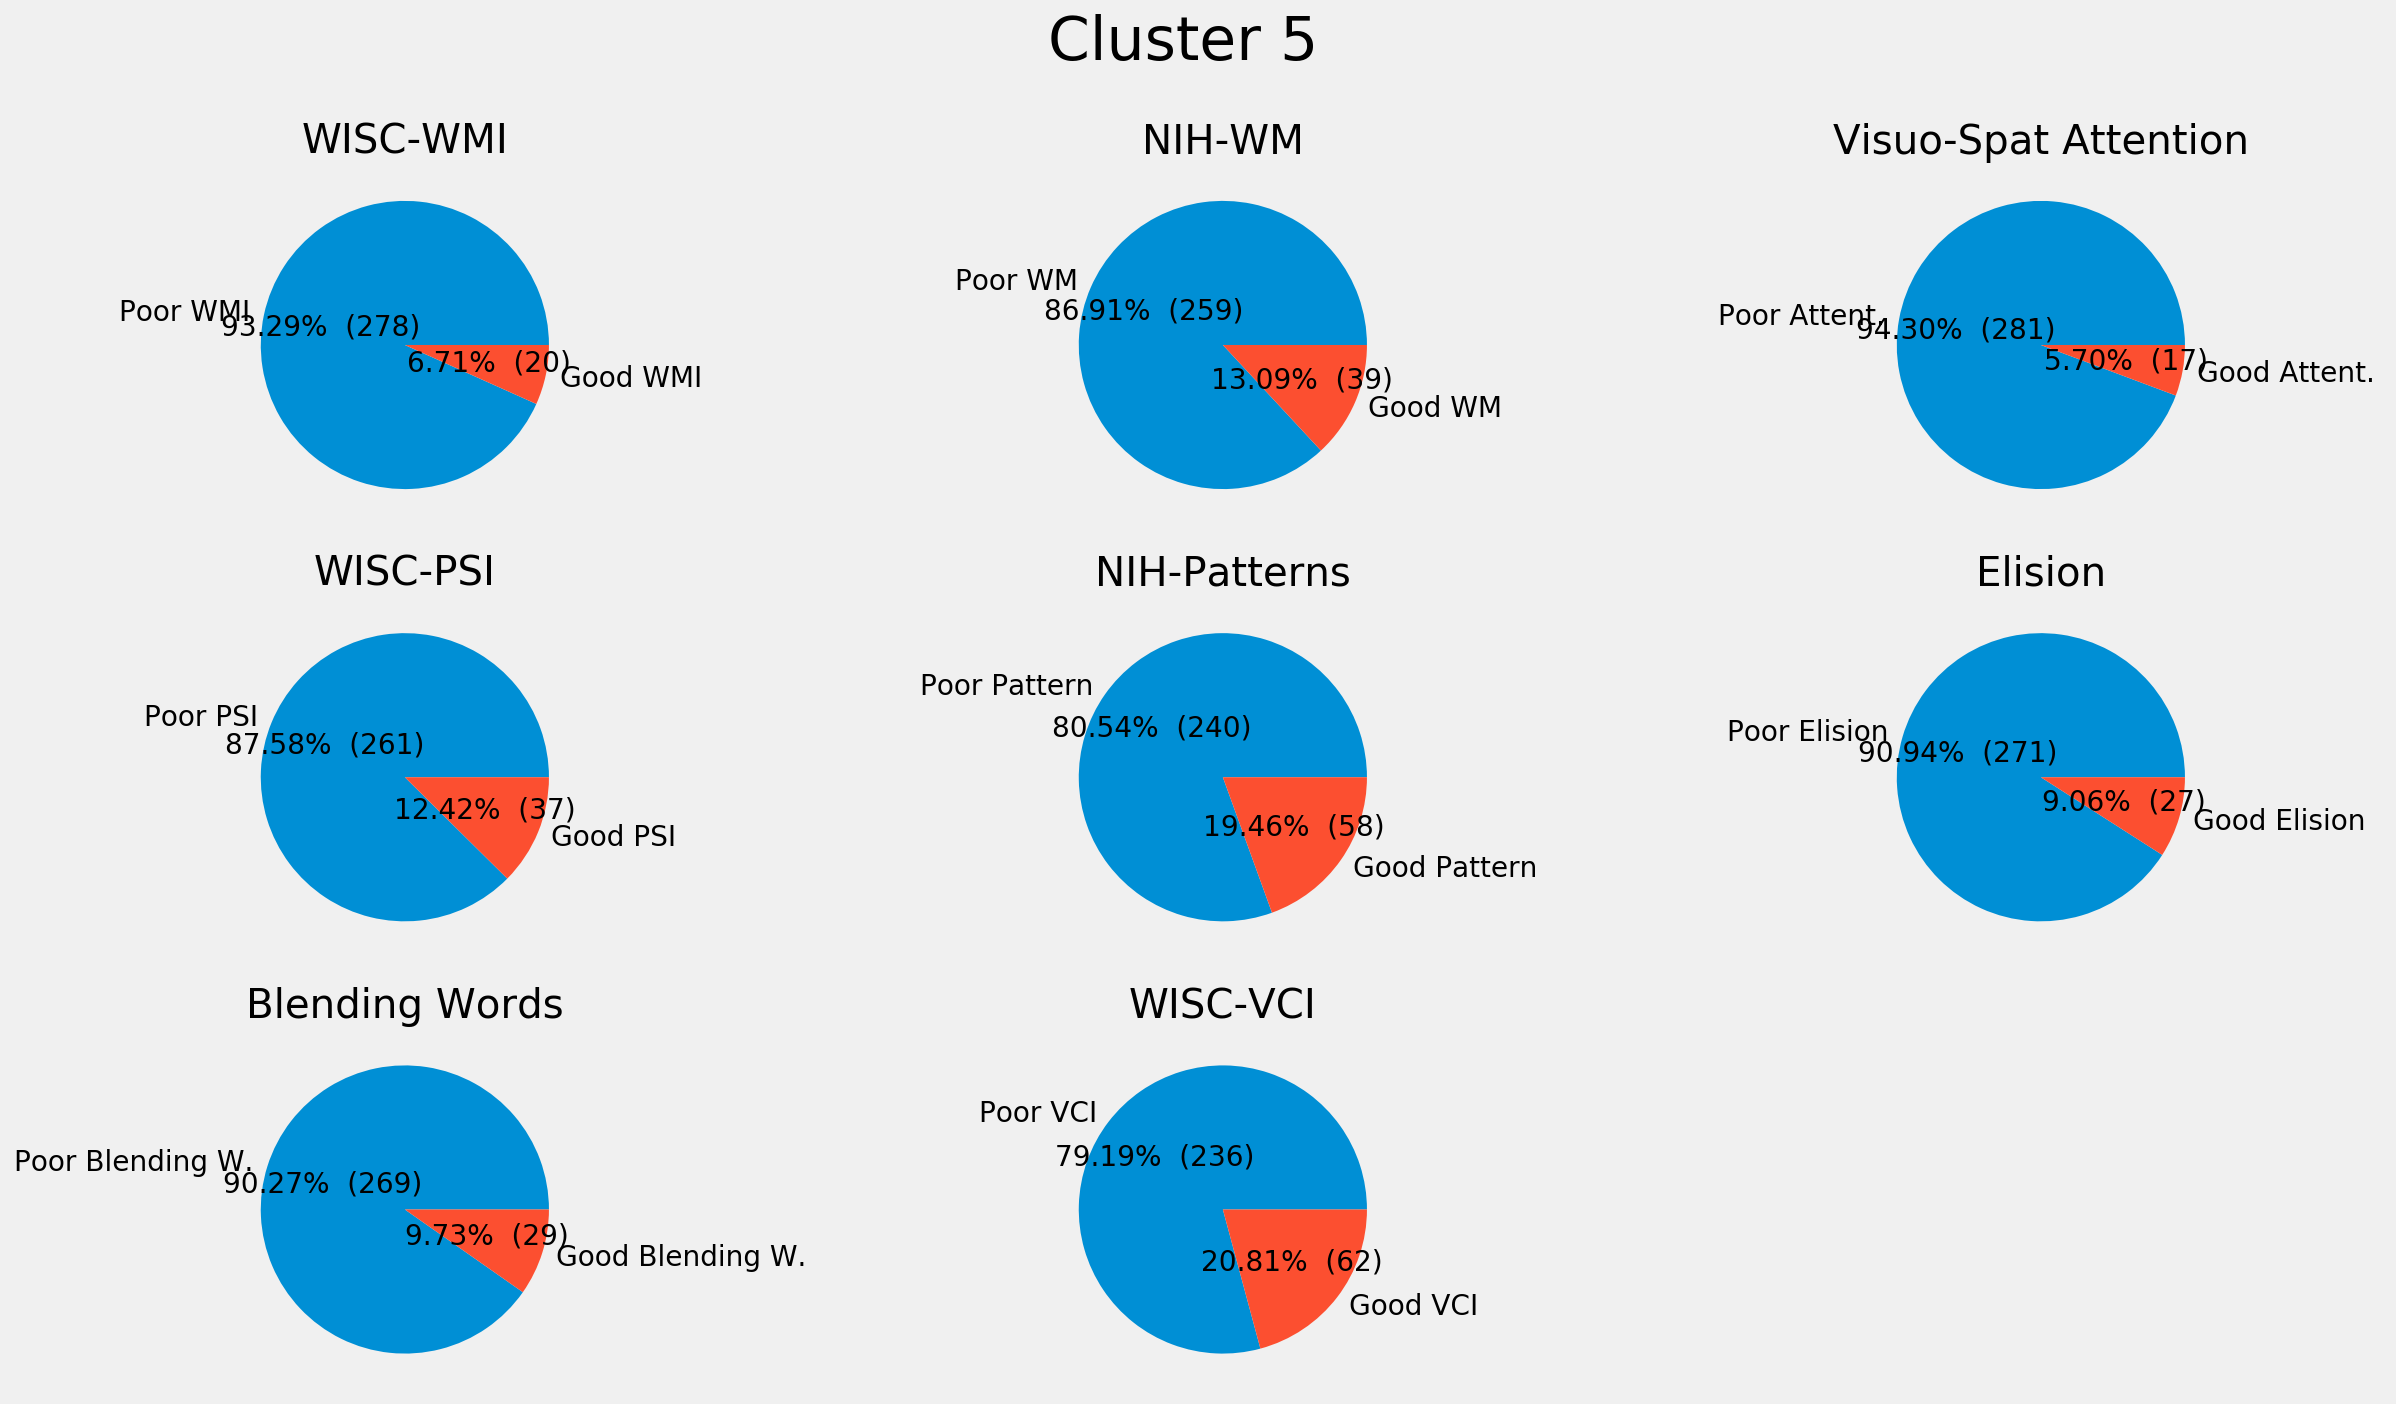

In [17]:
component_scores(df, 5)

In [18]:
def radar_profiles(DF, number):
    clust = DF[DF.Cluster == number]
        
    avg_WMI = clust[['WISC - WMI']].mean()
    avg_WM = clust[['NIH - WM']].mean()
    avg_PSI = clust[['WISC - PSI']].mean()
    avg_Pat = clust[['Pattern Comp.']].mean()
    avg_Att =  clust[['Visuo-Spat Attention']].mean()
    avg_El =  clust[['CTOPP - Elision']].mean()
    avg_BW =  clust[['CTOPP - Blended W']].mean()
    avg_VCI =  clust[['WISC - VCI']].mean()
    
    fig =plt.figure(figsize=(12,8))
    ax=plt.subplot(polar="Ture")
    
    categories = ['WISC - WMI', 'NIH - WM', 'WISC - PSI', 'Pattern Comp.', 'Visuo-Spat Attention', 'CTOPP - Elision', 'CTOPP - Blended W','WISC - VCI' ]
    
    N=len(categories)
    
    values = [avg_WMI, avg_WM, avg_PSI, avg_Pat, avg_Att, avg_El, avg_BW, avg_VCI]
    values +=values[:1]
    
    angles = [n/float(N)*2*pi for n in range(N)]
    angles += angles[:1]
    
    plt.polar(angles, values, marker ='.')
    plt.fill(angles, values, alpha=0.3)
    plt.xticks(angles[:-1], categories)
    
    plt.yticks([10,20,30, 40, 50 , 60, 70], color="grey", size=10)
    plt.title("Cluster: " + str(number))
    plt.show()


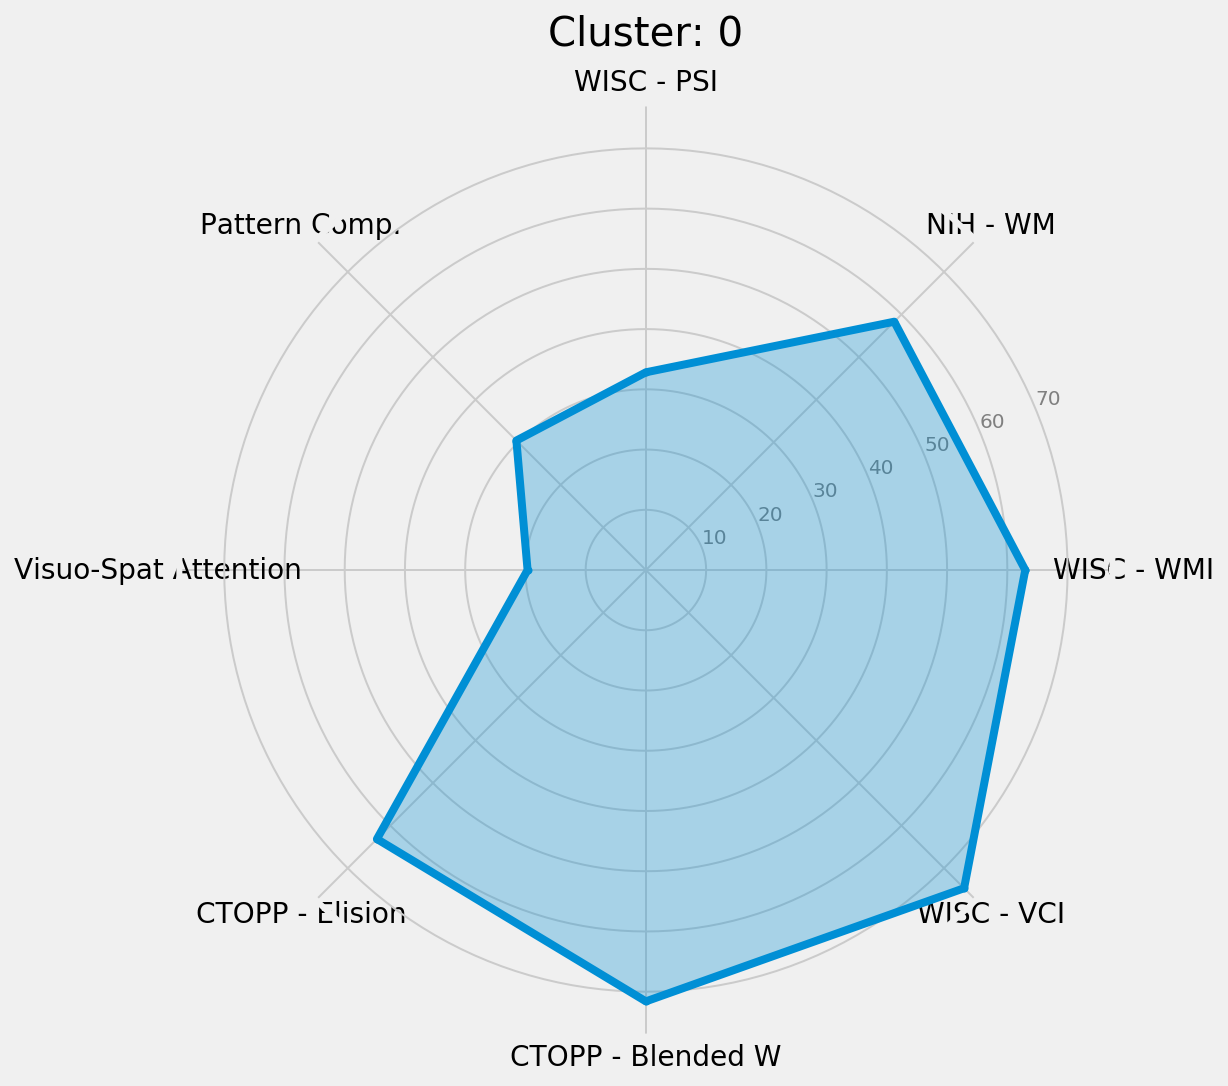

In [19]:
radar_profiles(df, 0)

## Grouping the Components:

To "group" the components, I am going to:
<br>Counted the number of participants who scored below the 40th percentile in both tests - Poor
<br>Count the number of participants who scored above the 50th percentile in both tests - Good
<br>Counted who scored below the 40th percentile in one only - Average
<br>As before the results are displayed in pie charts

In [20]:
def Four_Comp(DF, number):
    Cluster0 = DF[DF.Cluster == number]
    Cluster0=Cluster0.reset_index()
    length = Cluster0.shape[0]
    
    GoodWM=0
    AvgWM=0
    PoorWM=0
    
    GoodVP=0
    AvgVP=0
    PoorVP=0
    
    poorAtt=0
    goodAtt=0
    
    GoodPP=0
    AvgPP=0
    PoorPP=0
    
    poorVCI=0
    goodVCI=0

    for i in range(0,length-1):
        
        if  Cluster0['WISC - WMI'][i] <=40 and Cluster0['NIH - WM'][i] <=40:
            PoorWM+=1
        elif Cluster0['WISC - WMI'][i] >40 and Cluster0['NIH - WM'][i] >40:
            GoodWM+=1
        else: 
            AvgWM+=1

        if  Cluster0['WISC - PSI'][i] <=40 and Cluster0['Pattern Comp.'][i] <=40:
            PoorVP+=1
        elif Cluster0['WISC - WMI'][i] >40 and Cluster0['Pattern Comp.'][i] >40:
            GoodVP+=1
        else: 
            AvgVP+=1
            
        if  Cluster0['CTOPP - Elision'][i] <=40 and Cluster0['CTOPP - Blended W'][i] <=40:
            PoorPP+=1
        elif Cluster0['CTOPP - Elision'][i] >40 and Cluster0['CTOPP - Blended W'][i] >40:
            GoodPP+=1
        else: 
            AvgPP+=1
   


    for n in Cluster0['Visuo-Spat Attention']:
        if n<40:
            poorAtt= poorAtt+1
        elif n>=40:
            goodAtt=goodAtt+1

            
    for n in Cluster0['WISC - VCI']:
        if n<40:
            poorVCI= poorVCI+1
        elif n>=40:
            goodVCI=goodVCI+1

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    WMlabels = 'Poor WM', 'Good WM', 'Avg WM'
    VPlabels = 'Poor VP', 'Good VP', 'Avg VP'
    Attlabels= 'Poor Attent.', 'Good Attent.'
    PPlabels = 'Poor PP', 'Good PP', 'Avg PP'
    VCIlabels = 'Poor VCI', 'Good VCI'

    WMsize = [PoorWM, GoodWM, AvgWM]
    VPsize = [PoorVP, GoodVP, AvgVP]
    Attensize=[poorAtt, goodAtt]
    PPsize = [PoorPP, GoodPP, AvgPP]
    VCIsizes = [poorVCI, goodVCI]

    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle("Cluster " + str(number), fontsize=30)
    axs[0,0].pie(WMsize, labels=WMlabels,autopct=make_autopct(WMsize))
    axs[0,0].set_title('Working Memory')
    axs[0,1].pie(Attensize, labels =Attlabels, autopct = make_autopct(Attensize))
    axs[0,1].set_title('Attention')
    axs[0,2].pie(VPsize, labels=VPlabels, autopct=make_autopct(VPsize))
    axs[0,2].set_title('Visual Processing')
    axs[1,0].pie(PPsize, labels=PPlabels, autopct=make_autopct(PPsize))
    axs[1,0].set_title('Phological Processing')
    axs[1,1].pie(VCIsizes, labels=VCIlabels,autopct=make_autopct(VCIsizes))
    axs[1,1].set_title('WISC-VCI')
    axs[-1, -1].axis('off')

    plt.show()

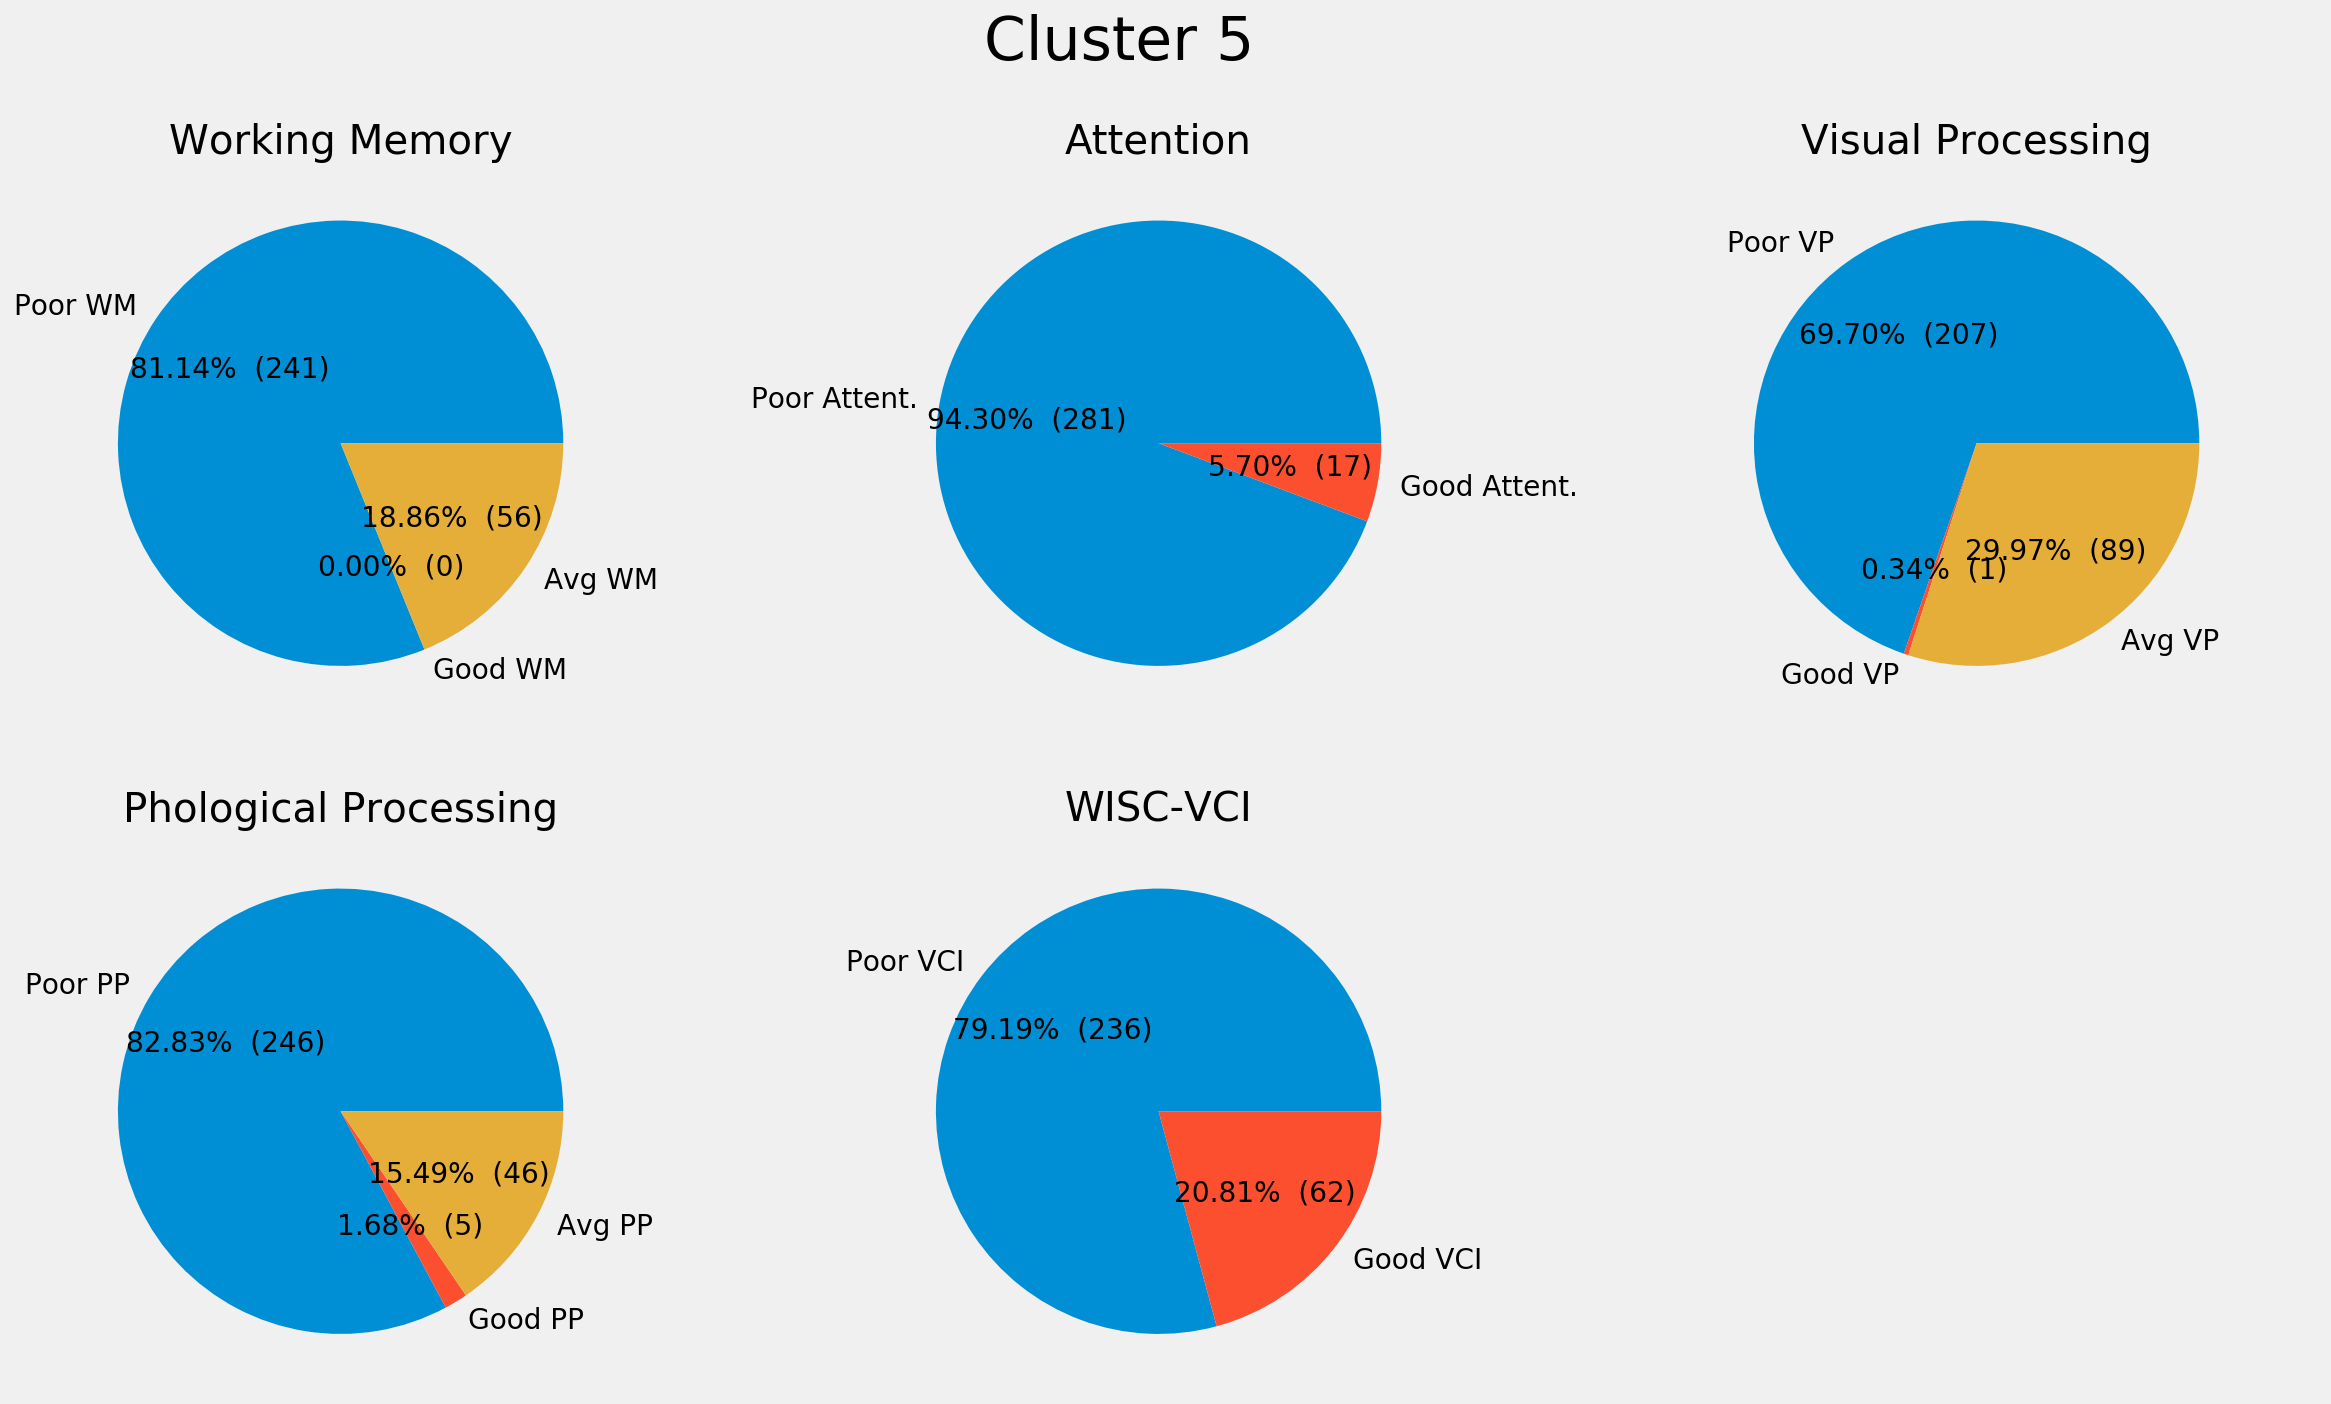

In [21]:
Four_Comp(df, 5)